In [108]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
from sklearn.kernel_ridge import KernelRidge
from scipy.interpolate import UnivariateSpline as spline
%matplotlib inline

df = pd.read_csv('ttl_daily.csv', names=['date', 'cnt']).ix[1:,:]
df['date'] = pd.to_datetime(df['date'])
df = df.sort_values(by='date')
df = df.reset_index().drop('index', 1)

In [109]:
print(df.shape)
df.head()

(3652, 2)


,date,cnt
0,2006-01-01,1485
1,2006-01-02,736
2,2006-01-03,850
3,2006-01-04,944
4,2006-01-05,975


In [110]:
df['m_d'] = df.date.apply(lambda x: x.strftime('%m-%d')) 
df['d'] = df.date.apply(lambda x: x.strftime('%d'))
df.head()

,date,cnt,m_d,d
0,2006-01-01,1485,01-01,01
1,2006-01-02,736,01-02,02
2,2006-01-03,850,01-03,03
3,2006-01-04,944,01-04,04
4,2006-01-05,975,01-05,05


In [111]:
vals = df['cnt'].values
dates = df['date'].values

In [159]:
sns.hls_palette(8, l=.3, s=.7)

[(0.51, 0.11519999999999997, 0.08999999999999997),
 (0.51, 0.43020000000000003, 0.08999999999999997),
 (0.27480000000000004, 0.51, 0.08999999999999997),
 (0.08999999999999997, 0.51, 0.22020000000000006),
 (0.08999999999999997, 0.4847999999999999, 0.51),
 (0.08999999999999997, 0.16979999999999987, 0.51),
 (0.32519999999999982, 0.08999999999999997, 0.51),
 (0.51, 0.08999999999999997, 0.37979999999999969)]

In [165]:
special_days = ['01-01', '02-14', '04-01', '07-14', '10-31', '12-24', '12-25']
festivals = ['New Year', 'Valentines', 'April Fool', 'Independence', 'Halloween', 'Xmas Eve', 'Xmas']
colors = sns.color_palette("hls", 7)

In [113]:
df_sp = df[df.m_d.isin(special_days)]
df_sp.head()

,date,cnt,m_d,d
0,2006-01-01,1485,01-01,01
44,2006-02-14,802,02-14,14
90,2006-04-01,1161,04-01,01
194,2006-07-14,1080,07-14,14
303,2006-10-31,1099,10-31,31


In [114]:
df_1st = df[df.d == '01']
df_1st.head()

,date,cnt,m_d,d
0,2006-01-01,1485,01-01,01
31,2006-02-01,1155,02-01,01
59,2006-03-01,1156,03-01,01
90,2006-04-01,1161,04-01,01
120,2006-05-01,1189,05-01,01


In [115]:
def smooth(x, y, nb):
    y_smooth = np.zeros(x.shape[0])
    for i in range(len(x)):
        if i-nb < 0:
            y_smooth[i] = np.mean(y[:i+11])
        elif i+nb+1 > len(y):
            y_smooth[i] = np.mean(y[i-nb:])
        else:
            y_smooth[i] = np.mean(y[i-nb:i+nb+1])
    return y_smooth

In [116]:
x = df.index.values
y = np.array(vals)
days = x.reshape([-1,1])
y_smooth_avg = smooth(x, y, 10)

x_sp = df_sp.index.values
y_sp = df_sp.cnt.values
days_sp = x_sp.reshape([-1, 1])

x_1st = df_1st.index.values
y_1st = df_1st.cnt.values
days_1st = x_1st.reshape([-1, 1])

In [129]:
print(y_sp.shape, days_sp.shape, len(y_sp), len(days_sp))

(70,) (70, 1) 70 70


In [132]:
x_sp[1]

44

In [38]:
def smooth(x, y, nb):
    y_smooth = np.zeros(x.shape[0])
    for i in range(len(x)):
        if i-nb < 0:
            y_smooth[i] = np.mean(y[:i+11])
        elif i+nb+1 > len(y):
            y_smooth[i] = np.mean(y[i-nb:])
        else:
            y_smooth[i] = np.mean(y[i-nb:i+nb+1])
    return y_smooth

/Users/Viola/anaconda/lib/python3.5/site-packages/matplotlib/font_manager.py:1288: UserWarning: findfont: Font family ['Helvetica Neue'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


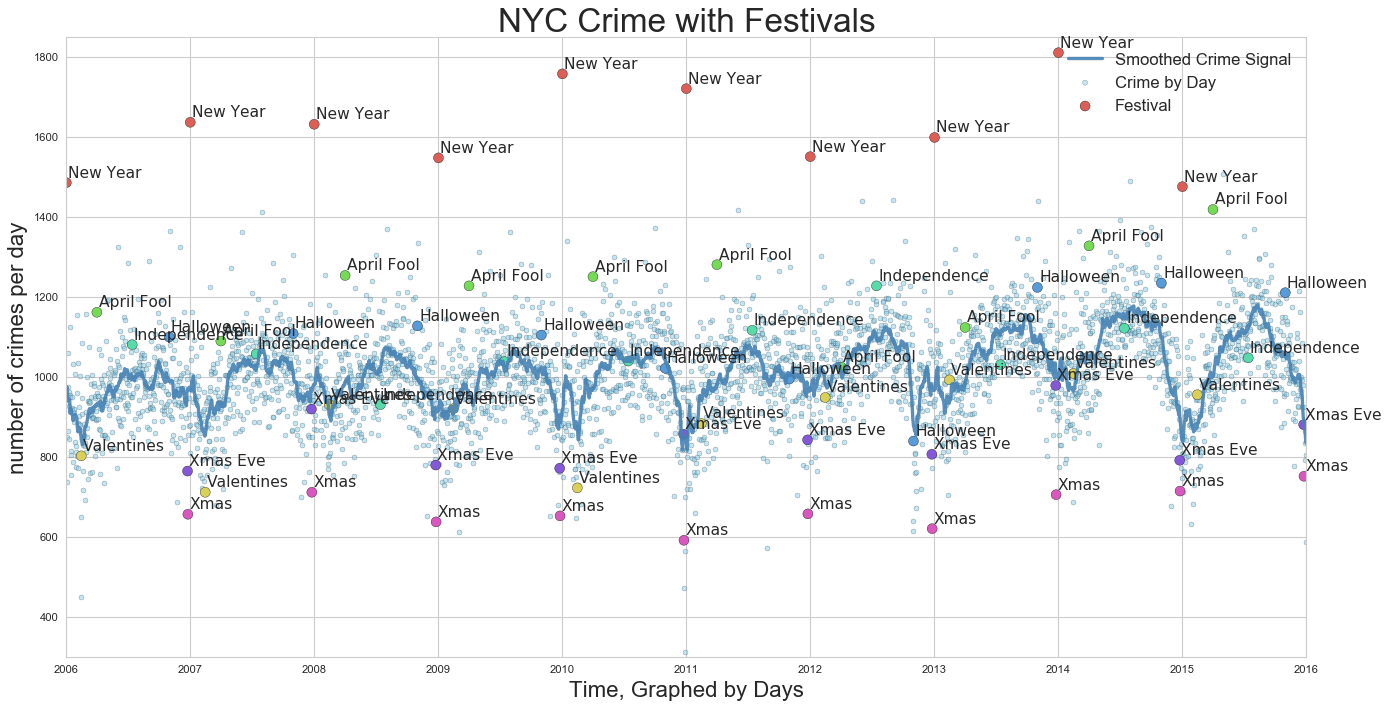

In [182]:
plt.figure(figsize=(20, 10))


plt.scatter(days, vals, s=20, alpha=.5, c='skyblue', label= 'Crime by Day')
plt.plot(days, y_smooth_avg, c='steelblue', alpha=.9, linewidth=3, label='Smoothed Crime Signal')

#
plt.scatter(days_sp, y_sp, c=colors, s=80, label='Festival')
# plt.scatter(days_1st, y_1st, c='red', s=30, alpha=0.5, label='First Day of Month')

font = {'family': 'Helvetica Neue', #'serif',
#         'color': 'darkred',  #'darkred',
        'weight': 'normal',
        'size': 14}

for idx in range(len(y_sp)):
    plt.text(x_sp[idx]+5, y_sp[idx]+15, festivals[idx % len(festivals)], fontdict=font)


plt.xlim(xmin=0, xmax=len(y))
plt.ylim(ymin=300, ymax=1850)
plt.xticks(np.arange(0, len(y)+1, 365).tolist(), np.arange(2006, 2017).tolist())
plt.ylabel('number of crimes per day', fontsize = 20)
plt.xlabel('Time, Graphed by Days', fontsize = 20)
plt.title('NYC Crime with Festivals', fontsize = 30)
plt.legend(fontsize = 15, loc=0)
plt.show()

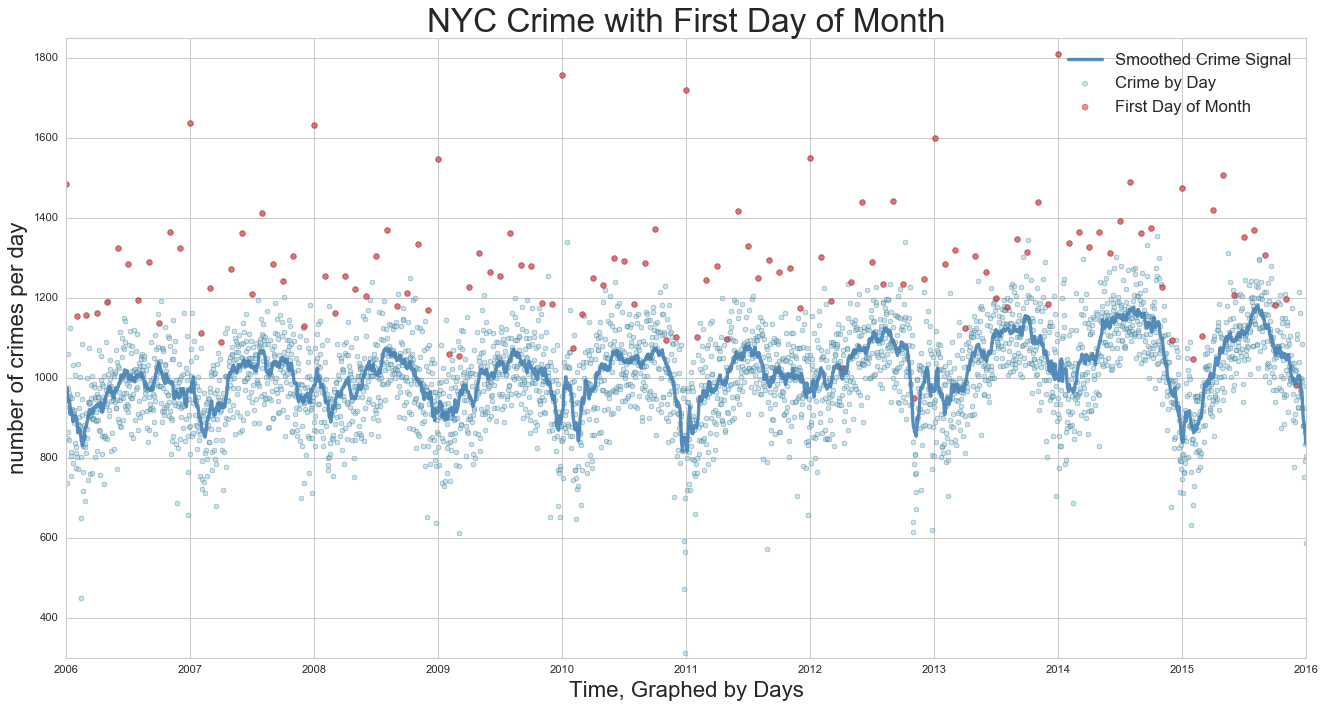

In [178]:
plt.figure(figsize=(20, 10))


plt.scatter(days, vals, s=20, alpha=.5, c='skyblue', label= 'Crime by Day')
plt.plot(days, y_smooth_avg, c='steelblue', alpha=.9, linewidth=3, label='Smoothed Crime Signal')

#
# plt.scatter(days_sp, y_sp, c='yellow', s=100, label='Festival')
plt.scatter(days_1st, y_1st, c='red', s=30, alpha=0.5, label='First Day of Month')

plt.xlim(xmin=0, xmax=len(y))
plt.ylim(ymin=300, ymax=1850)
plt.xticks(np.arange(0, len(y)+1, 365).tolist(), np.arange(2006, 2017).tolist())
plt.ylabel('number of crimes per day', fontsize = 20)
plt.xlabel('Time, Graphed by Days', fontsize = 20)
plt.title('NYC Crime with First Day of Month', fontsize = 30)
plt.legend(fontsize = 15, loc=0)
plt.show()

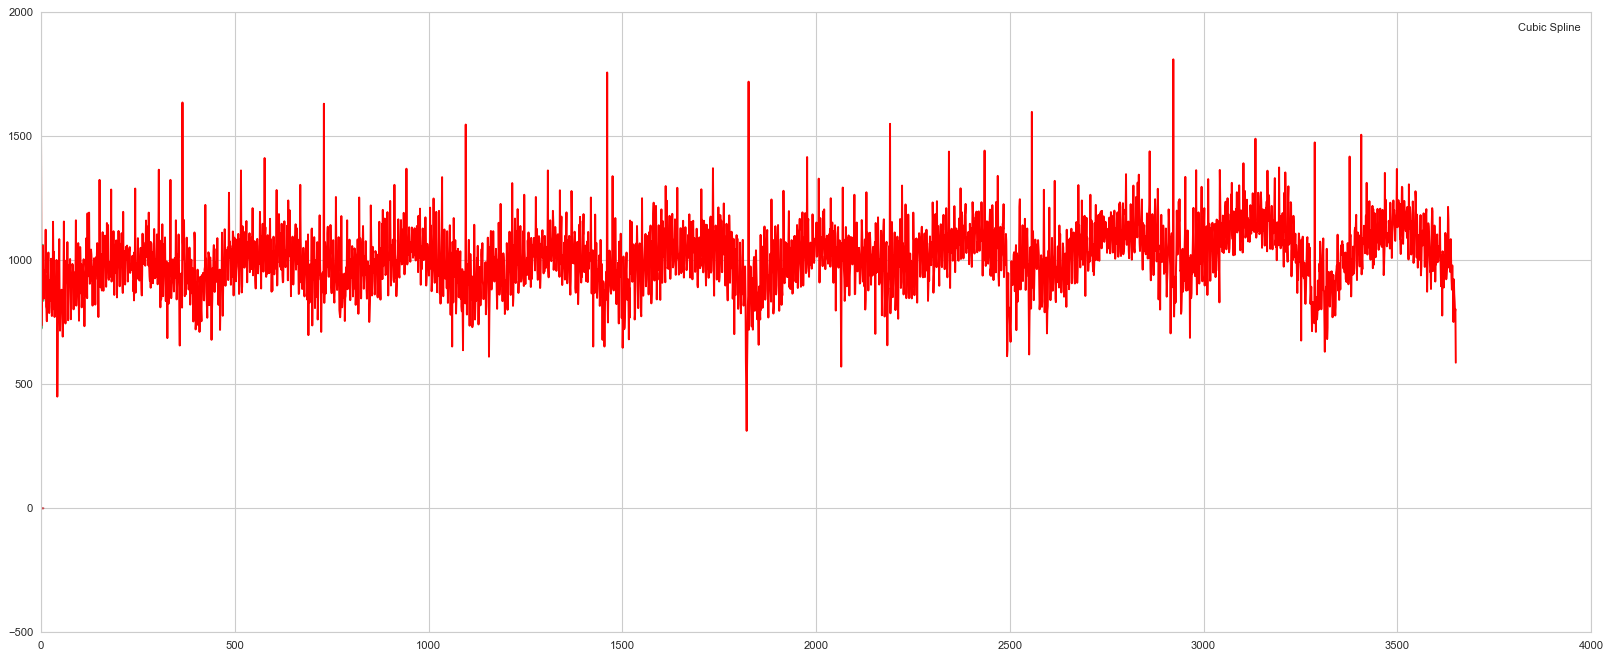

In [120]:
x = np.arange(len(vals))
y = vals

from scipy import interpolate
tck = interpolate.splrep(x, y, s=0)
xnew = np.arange(0, 2*np.pi, np.pi/50)
ynew = interpolate.splev(xnew, tck, der=0)


plt.figure(figsize=(25, 10))
plt.plot(x, y, 'x', xnew, ynew, xnew, np.sin(xnew), x, y, 'r')
# plt.legend(['Linear', 'Cubic Spline', 'True', 'LSQUnivariateSpline'])
plt.legend(['Cubic Spline'])
plt.show()